In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

filename1 = "history.data"

# Find the line with the header (starts with #)
with open(filename1, "r") as f:
    for i, line in enumerate(f):
        if line.startswith("#"):
            header_line = i
            break
h1= pd.read_csv("history.data", delim_whitespace=True, comment="!", header=0)

/tmp/ipykernel_5409/609677372.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  h1= pd.read_csv("history.data", delim_whitespace=True, comment="!", header=0)


In [3]:
h1.head()

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,601,0.000010,-5.000000,21.0,34.620725,-99.0,0.000000,0.999977,5.915693e-02,...,0.718000,0.267971,0.002413,0.006566,0.002413,0.006566,15.078000,5.627401,0,2
1,200,1108,24442.293442,2.890637,21.0,34.620725,-99.0,1.359833,0.063853,7.812883e-08,...,0.717874,0.267986,0.001649,0.006566,0.002413,0.006566,15.077756,5.627435,4,4
2,400,1138,224357.792806,3.000000,21.0,34.620725,-99.0,9.580760,0.454908,7.812883e-08,...,0.707976,0.277805,0.000060,0.005181,0.002413,0.006566,14.980785,5.722427,4,3
3,600,1130,424357.792806,3.000000,21.0,34.620725,-99.0,9.530569,0.452040,7.812883e-08,...,0.697648,0.288253,0.000070,0.004234,0.002413,0.006566,14.881264,5.822923,4,3
4,800,1130,624357.792806,3.000000,21.0,34.620725,-99.0,9.414668,0.447733,7.812883e-08,...,0.687134,0.298855,0.000078,0.003541,0.002413,0.006566,14.780707,5.924212,4,3


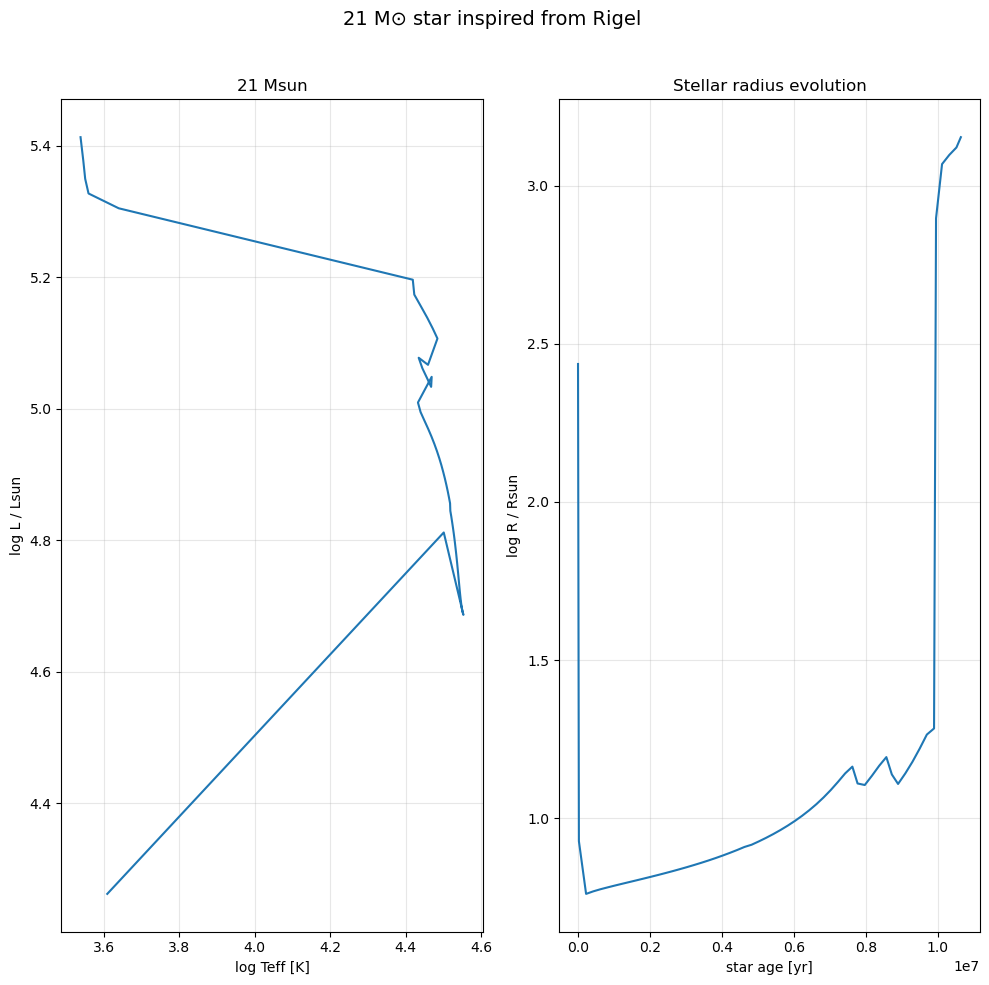

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# HR diagram (top-left)
ax[0].plot(h1['log_Teff'], h1['log_L'], linestyle='-')
ax[0].set_xlabel('log Teff [K]')
ax[0].set_ylabel('log L / Lsun')
ax[0].invert_xaxis()
ax[0].set_title('21 Msun')  

# Radius evolution (top-right)
ax[1].plot(h1['star_age'], h1['log_R'], linestyle='-')
ax[1].set_xlabel('star age [yr]')          # or /1e9 for Gyr
ax[1].set_ylabel('log R / Rsun')
ax[1].set_title('Stellar radius evolution')



# Optional: overall title
fig.suptitle('21 M⊙ star inspired from Rigel ', fontsize=14)

for a in ax.flat:
    a.grid(True, alpha=0.3)
    try:
        if 'Teff' in a.get_xlabel():   
            a.invert_xaxis()
    except:
        pass

plt.tight_layout(rect=[0, 0, 1, 0.96])   
plt.show()


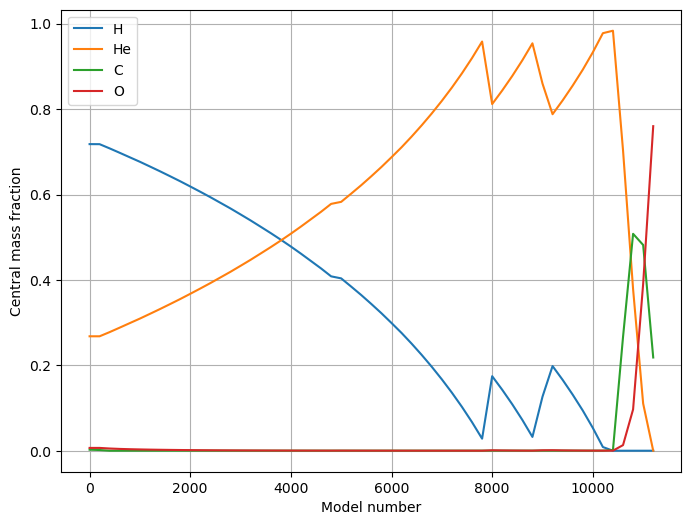

In [16]:
fig2, ax2 = plt.subplots(figsize=(8,6))

ax2.plot(h1['model_number'], h1['center_h1'], label='H')
ax2.plot(h1['model_number'], h1['center_he4'], label='He')
ax2.plot(h1['model_number'], h1['center_c12'], label='C')
ax2.plot(h1['model_number'], h1['center_o16'], label='O')

ax2.set_xlabel('Model number')
ax2.set_ylabel('Central mass fraction')
ax2.legend()
ax2.grid(True)
plt.show()
